# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px  
import plotly.graph_objects as go  
import cufflinks as cf  
cf.go_offline()

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



# Data Exploration, Cleaning, and Preparation

In [2]:
# Importing 12 monthly bike share datasets using pandas

oct_23 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\1_(10-23).csv')
nov_23 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\2_(11-23).csv')
dec_23 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\3_(12-23).csv')
jan_24 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\4_(01-24).csv')
feb_24 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\5_(02-24).csv')
mar_24 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\6_(03-24).csv')
apr_24 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\7_(04-24).csv')
may_24 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\8_(05-24).csv')
jun_24 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\9_(06-24).csv')
jul_24 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\10_(07-24).csv')
aug_24 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\11_(08-24).csv')
sep_24 = pd.read_csv(r'D:\Data analysis projects\Google Capstone Project\cyclistic_data_09_23_24\12_(09-24).csv')

In [3]:
# Adding all datasets to a list to concatenate them into a single DataFrame

df_list = [oct_23, nov_23, dec_23, jan_24, feb_24, mar_24, apr_24, may_24, jun_24, jul_24, aug_24, sep_24]
cyclistic = pd.concat(df_list, ignore_index= True)

In [4]:
# Exploring the DataFrame structure, data types, and non-null counts with .info()

cyclistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854544 entries, 0 to 5854543
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 580.7+ MB


In [5]:
# Removing duplicate rows to ensure data consistency

cyclistic.drop_duplicates(inplace= True)

In [6]:
# Displaying the first few rows of the DataFrame to preview the data

cyclistic.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member


In [7]:
# Converting 'started_at' and 'ended_at' columns from float to datetime format for accurate time analysis

cyclistic['started_at'] = pd.to_datetime(cyclistic['started_at'])
cyclistic['ended_at'] = pd.to_datetime(cyclistic['ended_at'])

In [8]:
# Exploring the DataFrame structure, data types, and non-null counts with .info()

cyclistic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5854544 entries, 0 to 5854543
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 625.3+ MB


In [9]:
# Displaying the first few rows of the DataFrame to preview the data

cyclistic.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member


In [10]:
# Creating a 'ride_length' column to calculate the duration of each ride

cyclistic['ride_length'] =  cyclistic['ended_at'] - cyclistic['started_at']

In [11]:
# Displaying the first few rows of the DataFrame to preview the data

cyclistic.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30


In [12]:
# Creating a 'day_of_week' column to identify the day each ride took place

cyclistic['day_of_week'] = cyclistic['started_at'].dt.day_name()

In [13]:
# Displaying the first few rows of the DataFrame to preview the data

cyclistic.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53,Sunday
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09,Wednesday
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20,Thursday
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26,Tuesday
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30,Monday


# Data Analysis and Insights

In [14]:
# Creating a pivot table to count 'ride_id' by 'member-casual' type for ride frequency analysis

cyclistic.pivot_table(index= 'member_casual', values= 'ride_id', aggfunc= 'count')

,ride_id
member_casual,
casual,2130893
member,3723651


In [15]:
# Creating a pivot table to calculate the average 'ride_length' for each 'member-casual' type

cyclistic.pivot_table(index= 'member_casual', values= 'ride_length', aggfunc= 'mean')

,ride_length
member_casual,
casual,0 days 00:25:08.800285792
member,0 days 00:12:49.213043636


In [16]:
# Creating a pivot table to find the maximum 'ride_length' for each 'member-casual' type

cyclistic.pivot_table(index= 'member_casual', values= 'ride_length', aggfunc= 'max')

,ride_length
member_casual,
casual,1 days 01:59:56
member,1 days 01:59:48


In [17]:
# Creating a pivot table to count the number of rides ('ride_length') by 'member_casual' type and 'day_of_week'

cyclistic.pivot_table(index= 'member_casual', columns='day_of_week', values= 'ride_length', aggfunc= 'count')

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,306168,254684,430162,366644,267693,234321,271221
member,520031,540237,473340,421872,583884,571083,613204


In [18]:
# Creating a pivot table to count the number of rides ('ride_id') for each 'member_casual' type by 'day_of_week'

cyclistic.pivot_table(index='day_of_week', columns= 'member_casual', values= 'ride_id', aggfunc= 'count')

member_casual,casual,member
day_of_week,,
Friday,306168,520031
Monday,254684,540237
Saturday,430162,473340
Sunday,366644,421872
Thursday,267693,583884
Tuesday,234321,571083
Wednesday,271221,613204


<Axes: xlabel='member_casual', ylabel='day_of_week'>

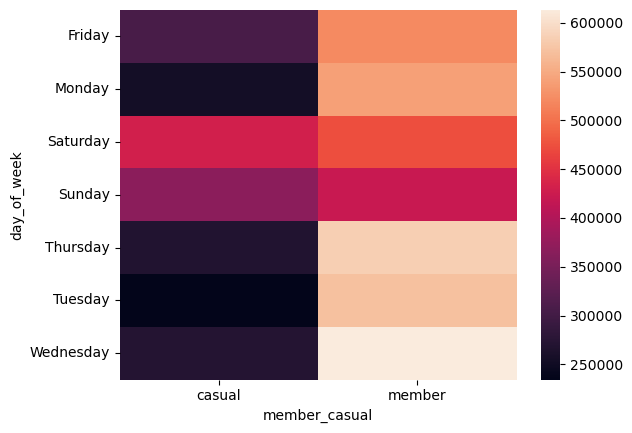

In [19]:
# Visualizing the pivot table

sns.heatmap(cyclistic.pivot_table(index='day_of_week', columns= 'member_casual', values= 'ride_id', aggfunc= 'count'))

In [20]:
# Exploring the DataFrame structure, data types, and non-null counts with .info()

cyclistic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5854544 entries, 0 to 5854543
Data columns (total 15 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_length         timedelta64[ns]
 14  day_of_week         object         
dtypes: datetime64[ns](2), float64(4), object(8), timedelta64[ns](1)
memory usage: 714.7+ MB


In [21]:
# Displaying the first few rows of the DataFrame to preview the data

cyclistic.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53,Sunday
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09,Wednesday
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20,Thursday
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26,Tuesday
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30,Monday


In [22]:
# Create a pivot table to count the number of rides ('ride_id') by 'rideable_type' and 'member_casual' type

cyclistic.pivot_table(index= 'rideable_type', columns= 'member_casual', values= 'ride_id', aggfunc= 'count')

member_casual,casual,member
rideable_type,,
classic_bike,970804,1814674
electric_bike,1074874,1849855
electric_scooter,85215,59122


<Axes: xlabel='member_casual', ylabel='rideable_type'>

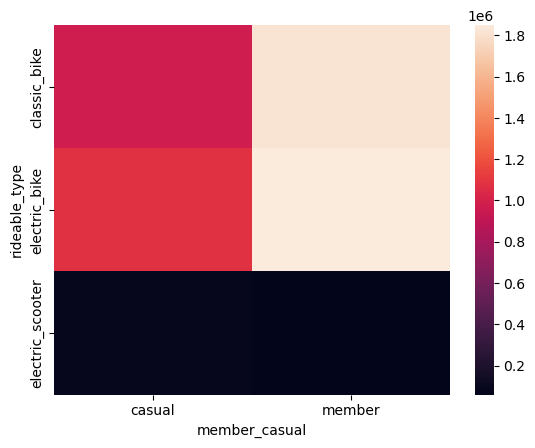

In [23]:
# Visualizing the pivot table

sns.heatmap(cyclistic.pivot_table(index= 'rideable_type', columns= 'member_casual', values= 'ride_id', aggfunc= 'count'))

In [24]:
# Counting the occurrences of each 'ride_id' to identify the frequency of individual rides

cyclistic['ride_id'].value_counts()

50D08B03C457099F    2
BDEBE20B7BAA1E46    2
0C2E6C64DFAB2BB2    2
997078F5B91EA984    2
1FB582CE5090E54E    2
                   ..
061553AA9D4A3987    1
F4F27C143576834F    1
71378055DEFD6608    1
320938AB6DBC3DD3    1
781862ED31812AE7    1
Name: ride_id, Length: 5854333, dtype: int64

In [25]:
# Displaying the first few rows of the DataFrame to preview the data

cyclistic.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53,Sunday
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09,Wednesday
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20,Thursday
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26,Tuesday
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30,Monday


In [26]:
# Extracting the date from 'started_at' column and create a new 'date' column

cyclistic['date'] = cyclistic['started_at'].dt.date

In [27]:
# Displaying the first few rows of the DataFrame to preview the data

cyclistic.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,date
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53,Sunday,2023-10-08
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09,Wednesday,2023-10-11
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20,Thursday,2023-10-12
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26,Tuesday,2023-10-24
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30,Monday,2023-10-09


In [28]:
# Creating a pivot table to count the number of rides ('ride_id') by 'date' and 'member_casual' type

date_ride_id = cyclistic.pivot_table(index= 'date', columns= 'member_casual', values= 'ride_id', aggfunc= 'count')

In [38]:
# Creating an interactive plot for the 'date_ride_id' pivot table

date_ride_id.iplot()

In [30]:
# Extracting the hour from 'started_at' column and create a new 'hour' column

cyclistic['hour'] = cyclistic['started_at'].dt.hour

In [31]:
# Creating a pivot table to count the number of rides ('ride_id') by 'hour' and 'member_casual' type

hour_ride_id = cyclistic.pivot_table(index= 'hour', columns= 'member_casual', values= 'ride_id', aggfunc= 'count')

In [45]:
# Creating an interactive plot for the 'hour_ride_id' pivot table

hour_ride_id.iplot()

In [33]:
cyclistic.to_csv('cyclistic.csv', index= False)